# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 


## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?

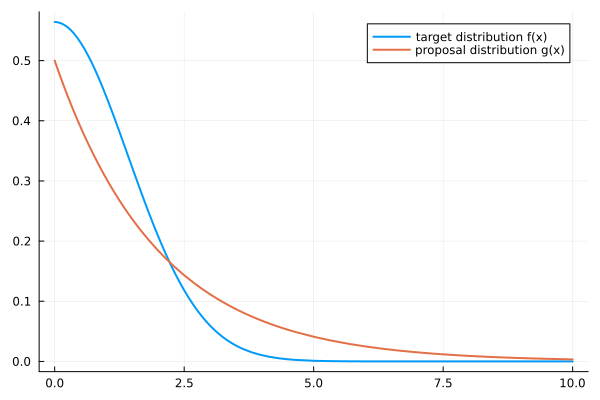

In [5]:
using Distributions, StatsPlots, StatsFuns, Plots

σ=sqrt(2)
# Define a half-normal distribution with σ=sqrt(2)
# TruncatedNormal(mu, sigma, lower bound, upper bound)
hn = TruncatedNormal(0, σ, 0, Inf) 
my_exp= Exponential(2)


plot(x -> pdf(hn, x), 0,10,linewidth=2, label="target distribution f(x)")

plot!(x -> pdf(my_exp,x), 0,10,linewidth=2, label="proposal distribution g(x)")


We know that exponential distribution and half-normal distribution share the same support, which is $[0,\infty)$

The value m is defined to be $sup\frac{f(x)}{g(x)}$. 

From a visual inspection of the above graph, we can see that m is most likey to occur in the range of $[0,2]$

## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 

In [7]:
m=0
for x in 0:0.01:10
   ratio = pdf(hn, x) / pdf(my_exp, x)
   if ratio>m
            m=ratio
   end
end

m

1.4488675302115823

In [8]:
m = maximum(pdf(hn, x) / pdf(my_exp, x) for x in 0:0.01:10)

1.4488675302115823

## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.

In [24]:
# Define the number of samples to generate
n_samples = 100000

# Generate n_samples samples from the target distribution hn

samples = Float64[] #空的浮點數數組 (array)

while length(samples) < n_samples
    
    # Sample from the proposal distribution
    x = rand(my_exp)
    
    # Calculate the acceptance probability
    y = rand()
    
    if y <= pdf(hn, x) / (m*pdf(my_exp, x))
        push!(samples, x)
    end
end



若v是向量，x是一个元素， `push!(v, x)`修改向量v， 將x添加到向量v的末尾。

若x也是向量，要改用`append!(v,x)`


In [21]:
# Define the number of samples to generate
n_samples = 100000

# Generate n_samples samples from the target distribution hn

samples = zeros(n_samples) 

i=1
while i < n_samples
    
    # Sample from the proposal distribution
    x = rand(my_exp)
    
    # Calculate the acceptance probability
    y = rand()
    
    if y <= pdf(hn, x) / (m*pdf(my_exp, x))
        samples[i]=x
        i+=1
    end
end

## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

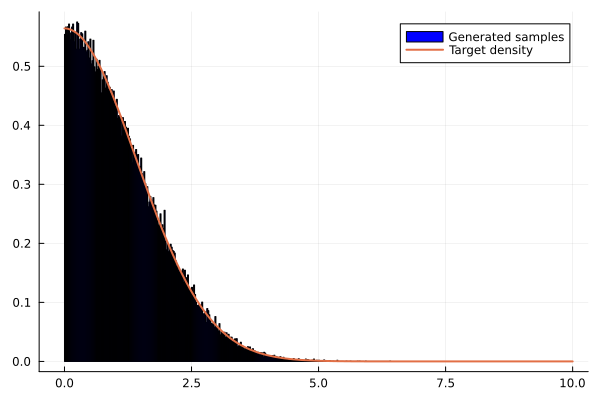

In [25]:
histogram(samples, normalize=true, bins=:sqrt, label="Generated samples", color=:blue)
plot!(x -> pdf(hn, x), 0,10,linewidth=2, label="Target density")


In [26]:
println("The theoretical mean is $(mean(hn)) and the theoretical variance is $(var(hn))")
println("The numerical mean is $(mean(samples)) and the numerical variance is $(var(samples)) ")

# The results are very close

The theoretical mean is 1.1283791670955128 and the theoretical variance is 0.7267604552648372
The numerical mean is 1.133615562252805 and the numerical variance is 0.7279050300889274 
